<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
    <li><span><a href="#Summary-of-the-Data" data-toc-modified-id="Summary-of-the-Data-2">Summary of the Data</a></span></li>
    <li><span><a href="#Single-Variable-Analysis" data-toc-modified-id="Single-Variable-Analysis-3">Single Variable Analysis</a></span>
      <ul class="toc-item">
        <li><span><a href="#Demographic-Data" data-toc-modified-id="Demographic-Data-3.1.1">Demographic Data</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Multivariable-Analysis" data-toc-modified-id="Multivariable-Analysis-4">Multivariable Analysis</a></span></li>
    <li><span><a href="#Time-Data-Analysis" data-toc-modified-id="Time-Data-Analysis-5">Time Data Analysis</a></span>
      <ul class="toc-item">
        <li><span><a href="#Day-of-Week-Seasonality-Analysis" data-toc-modified-id="Day-of-Week-Seasonality-Analysis-5.1">Day of Week Seasonality Analysis</a></span></li>
        <li><span><a href="#Fiscal-Week-Seasonality-Analysis" data-toc-modified-id="Fiscal-Week-Seasonality-Analysis-5.2">Fiscal Week Seasonality Analysis</a></span></li>
        <li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-5.3">Correlation Analysis</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Results" data-toc-modified-id="Results-6">Results</a></span></li>
    <li><span><a href="#Group-Member-Contributions" data-toc-modified-id="Group-Member-Contributions-7">Group Member Contributions</a></span></li>
    <li><span><a href="#Appendix-1:-Data-Dictionaries" data-toc-modified-id="Appendix-1:-Data-Dictionaries-8">Appendix 1: Data Dictionaries</a></span></li>
    <li><span><a href="#Appendix-2:-Single-Variable-Charts" data-toc-modified-id="Appendix-2:-Single-Variable-Charts-9">Appendix 2: Single Variable Charts</a></span></li>
    <li><span><a href="#Appendix-3:-Multivariate-Charts" data-toc-modified-id="Appendix-3:-Multivariate-Charts-10">Appendix 3: Multivariate Charts</a></span></li>
  </ul>
</div>

## Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
%matplotlib inline

## Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
time_df = pd.read_csv("../Maverik_Capstone/data/time_series_data_msba.csv")
main_df = pd.read_csv("../Maverik_Capstone/data/qualitative_data_msba.csv")

In [3]:
ts_data = pd.read_csv('../Maverik_Capstone/data/time_series_data_msba.csv')
ts_data = ts_data.drop(ts_data.columns[0], axis=1)
ts_data = ts_data.rename(columns={'daily_yoy_ndt.total_inside_sales':'inside_sales',
                                  'daily_yoy_ndt.total_food_service':'food_service'})

qual_data = pd.read_csv('../Maverik_Capstone/data/qualitative_data_msba.csv')
qual_data = qual_data.drop(qual_data.columns[0], axis=1)

info_cols = ['capital_projects.soft_opening_date',
             'calendar.calendar_day_date',
             'calendar.fiscal_week_id_for_year',
             'calendar.day_of_week',
             'calendar_information.holiday',
             'calendar_information.type_of_day',
             'site_id_msba']

ts_data_melt = ts_data.melt(info_cols,
                            var_name='Sales Type',
                            value_name='Amount')

In [4]:
## Creating a function to plot 
def null_val_analysis(data, string):
    '''This function give a rough idea about the presence of null values in the dataframe
    '''
    plt.subplots(figsize = (25,5))
    sns.heatmap(data.isna(),yticklabels=False, cbar=False)
    plt.xlabel('Column Name',fontsize = 15)
    plt.title('Null value analysis of ' + string ,fontsize = 20)
    plt.xticks(fontsize=15)
    
def give_columns(df):
    return [col for col in df.columns]

def rename_columns(df,col_list):
    col_map = dict(zip(df.columns, col_list))
    return df.rename(columns=col_map, inplace=True)


def plot_c(df,col,x,y):
    # plt.figure(figsize = (3,3))
    sns.set_style("whitegrid")
    sns.countplot(ax = axes[x,y], data=df, x=col)
    # axes[x,y].set_title('Count Plot of ' + str(col) ,fontweight='bold')
    axes[x,y].set_xlabel(col, fontweight='bold', horizontalalignment='center')
    if y == 0: 
        axes[x,y].set_ylabel('Count',fontweight='bold', horizontalalignment='center')
    else:
        axes[x,y].set_ylabel('')
    # plt.show()

def plot_multi_var_analysis_main_df(y_col,hue_col,x,y):
    # plt.figure(figsize = (3,3))
    sns.set_style("whitegrid")
    sns.barplot(ax = axes[x,y], data=main_df, x='open_year', y=y_col, hue=hue_col, ci=None) 
    axes[x,y].set_title(y_col + ' vs ' + hue_col , fontweight='bold')
    axes[x,y].get_legend().remove()
    # axes[x,y].set_xlabel('open_year', fontweight='bold', horizontalalignment='center')
    # if y == 0: 
    #     # axes[x,y].set_ylabel(y_col ,fontweight='bold', horizontalalignment='center')
    # else:
    axes[x,y].set_ylabel('')
    
    # plt.show()

def find_categorical(df):
    col_list = []
    for col in df.columns:
        vals = df[col].nunique()
        if vals <= 10:
            col_list.append(col)
    return col_list

In [5]:
## Dropping the column:
col_to_drop = ['Unnamed: 0']
##from time_df
time_df = time_df[[col for col in time_df.columns if col not in col_to_drop ]]
## from Main df
main_df= main_df[[col for col in main_df.columns if col not in col_to_drop ]]

## Introduction

The goal of this project is to develop a robust forecasting solution to address critical business challenges faced by Maverik as it expands its operations and opens new store locations. The primary business problem is the need for accurate predictions of sales within four key segments (Diesel, Unleaded, Inside Sales, and Food Service) during the first year of a new store's operation, along with daily performance forecasts for these segments.  

The purpose of this Exploratory Data Analysis (EDA) notebook is to lay the foundation for our forecasting model by examining and understanding the data. We aim to answer important questions about the data, such as identifying key patterns, seasonality, and store characteristics that will inform the development of accurate sales forecasts. By achieving this, our forecasting solution will empower Maverik to make informed strategic decisions, optimize resources, enhance financial planning, and ensure sustainable growth, all while maximizing profitability. Success will be measured by forecast accuracy, financial impact and operational efficiency improvements.  

## Summary of the Data

Here we will go through and write out some code to descripe the shape of the data, and possibly some text analytic methods to help see what are common variables

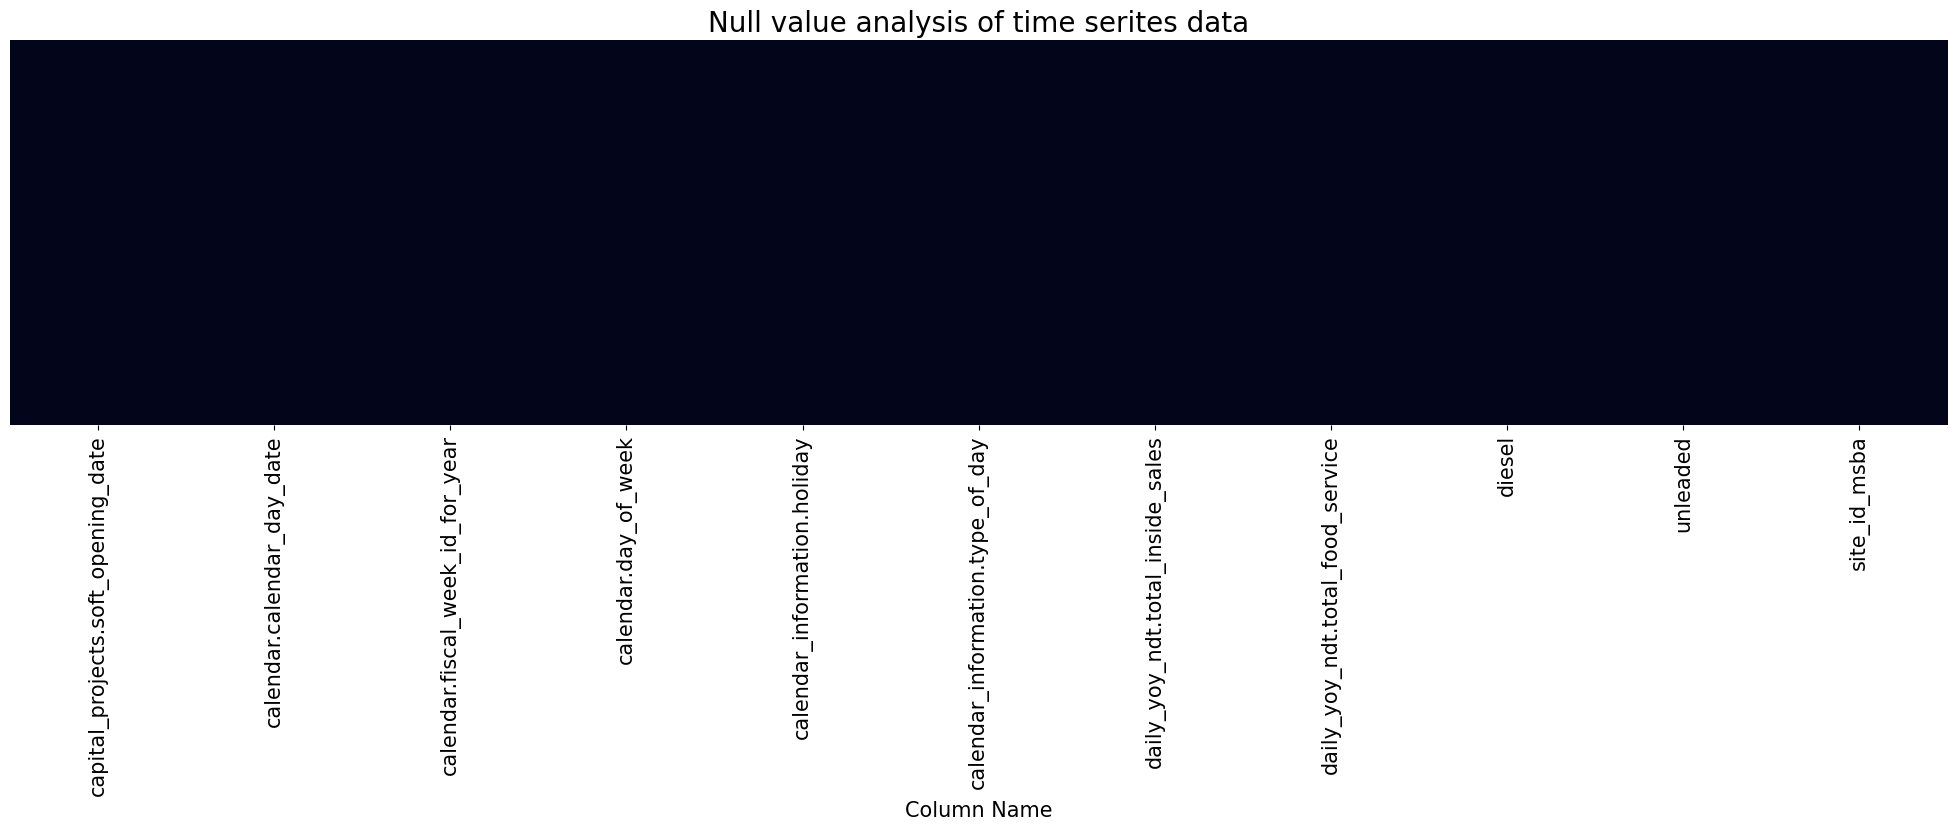

In [6]:
null_val_analysis(time_df, 'time serites data')

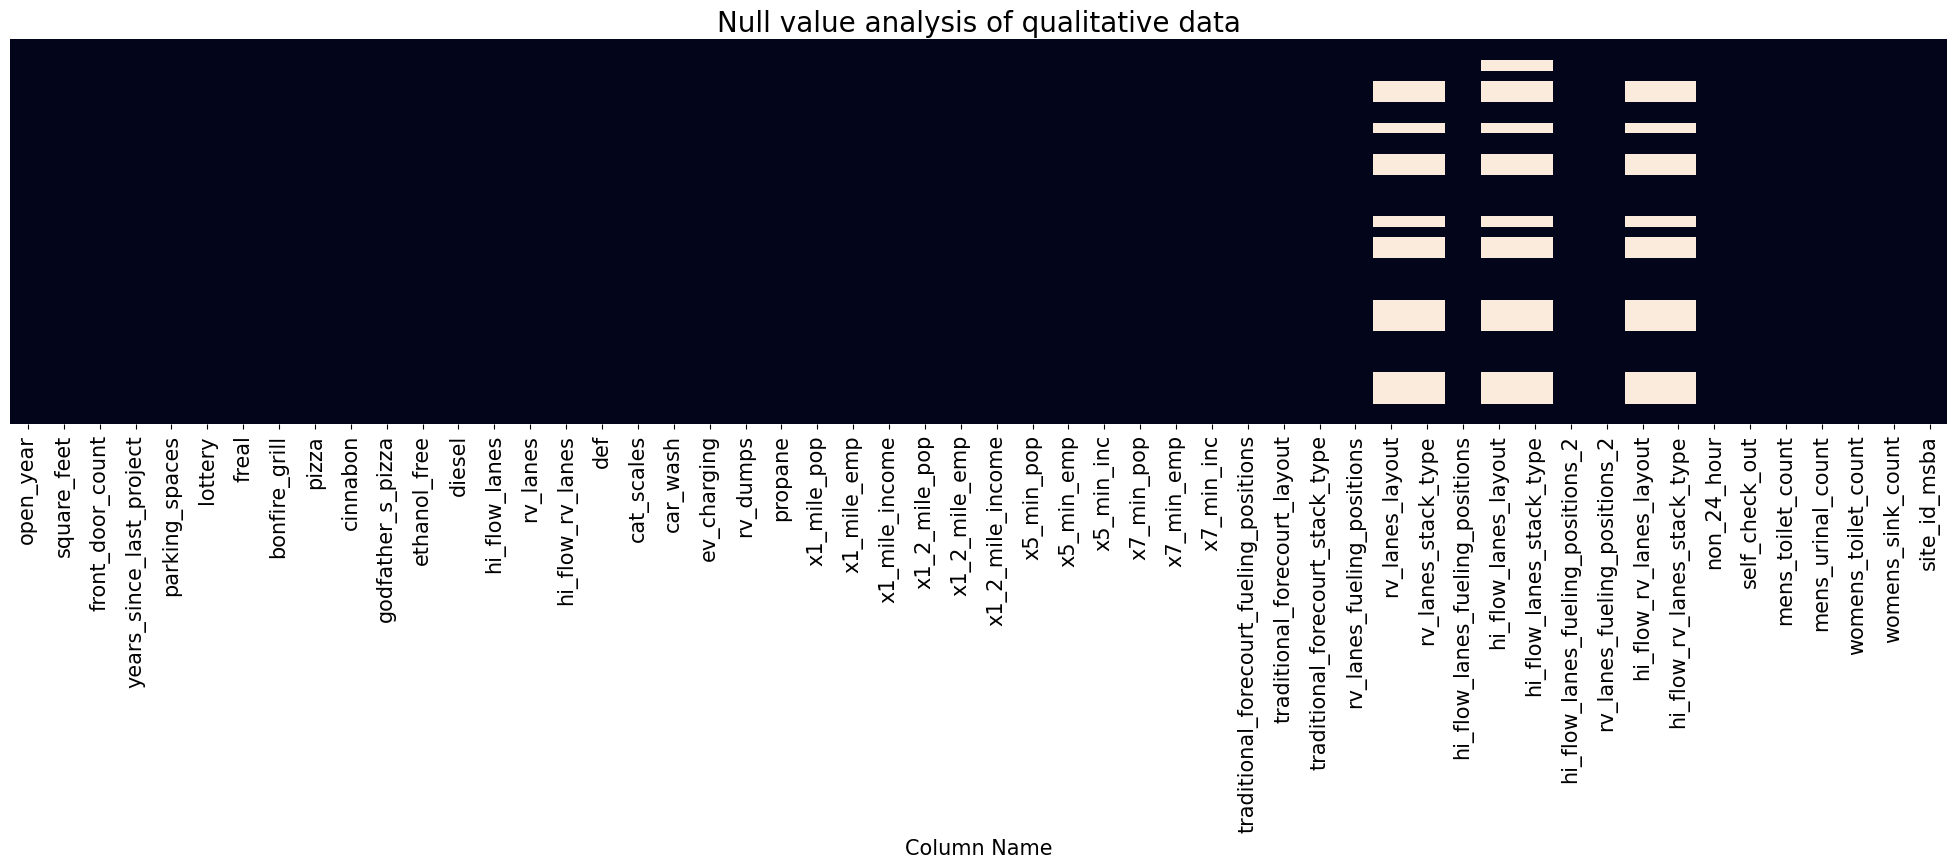

In [7]:
null_val_analysis(main_df, 'qualitative data')

In [8]:
main_df.fillna('UNKNOWN', inplace=True)
print('The shape of qualitative data is', main_df.shape)
print('The shape of time series data is', time_df.shape)
print('Unique sites in qualitative data: ', main_df.site_id_msba.nunique())
print('Unique sites in time series data: ', time_df.site_id_msba.nunique())

The shape of qualitative data is (37, 54)
The shape of time series data is (13908, 11)
Unique sites in qualitative data:  37
Unique sites in time series data:  38


In [9]:
for i in (set(list(time_df.site_id_msba))):
    if i not in list(main_df.site_id_msba):
        print('SITE ID THAT IS NOT PRESENT IN Qualitative Data is :')
        print(i)

SITE ID THAT IS NOT PRESENT IN Qualitative Data is :
23065


In [10]:
#checking the number of rows related to this id 
time_df[time_df['site_id_msba'] == 23065].shape

(366, 11)

In [11]:
# performing inner join
joined_df = pd.merge(time_df, main_df, on='site_id_msba', how='inner')
joined_df.shape

(13542, 64)

### Single Variable Analysis

We utilized bar plots to gain insights into various attributes of the stores in our dataset. These visualizations revealed different trends, such as fluctuations in store openings between 2021 and 2022. In 2021, more stores were opened, and all stores maintained consistent sizes. Notably, every store featured two front doors, while lottery offerings and Freal products, Pizza and Cinnabon were available at most stores, and no store offered Godfather's Pizza. Regarding fuel-related amenities, most stores provided ethanol-free fuel, and all stores offered diesel, but the presence of high-flow lanes, RV facilities, and RV dumps varied. Self-checkout was universal, and restroom facilities exhibited minor variations while maintaining consistency. These visualizations offered valuable insights into the dataset's characteristics.  

##### *Charts Available in Appendix 2*

Text(0.5, 0, '')

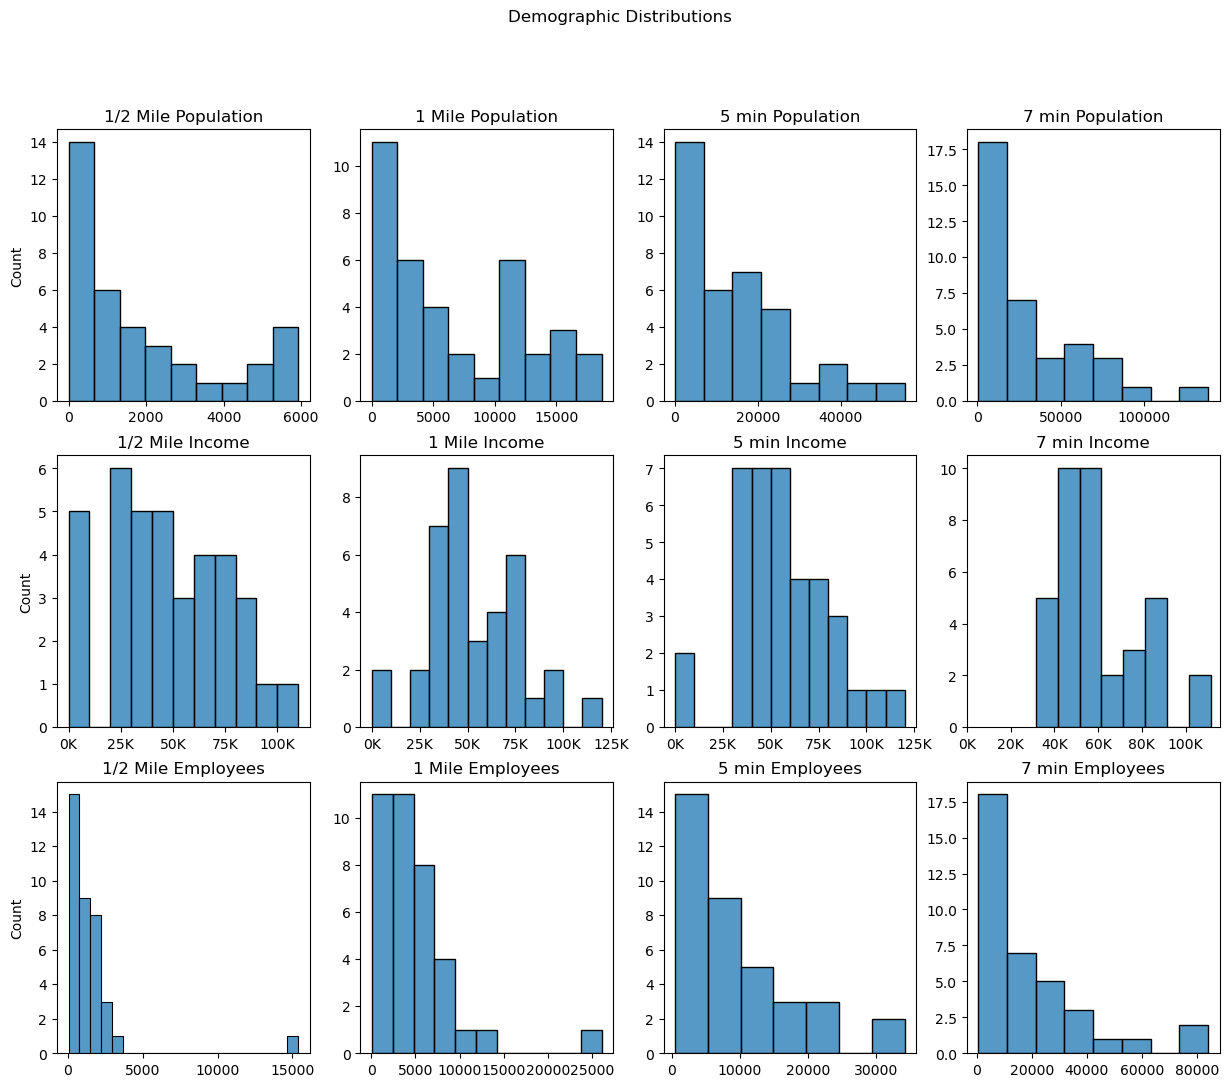

In [12]:
pop = qual_data[['site_id_msba', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
                 'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
                 'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc']]

fig, axes = plt.subplots(3, 4, figsize =(15,12))
fig.suptitle('Demographic Distributions')

#1/2 Mile Pop
sns.histplot(ax = axes[0,0], x=pop.x1_2_mile_pop, bins=9)
axes[0,0].set_title('1/2 Mile Population')
axes[0,0].set_xlabel('')
# 1 Mile Pop
sns.histplot(ax = axes[0,1], x=pop.x1_mile_pop, bins=9)
axes[0,1].set_title('1 Mile Population')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
# 5 min Pop
sns.histplot(ax = axes[0,2], x=pop.x5_min_pop, bins=8)
axes[0,2].set_title('5 min Population')
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('')
# 7 min Pop
sns.histplot(ax = axes[0,3], x=pop.x7_min_pop, bins=8)
axes[0,3].set_title('7 min Population')
axes[0,3].set_ylabel('')
axes[0,3].set_xlabel('')

#1/2 Mile Income
sns.histplot(ax = axes[1,0], x=pop.x1_2_mile_income, binwidth = 10000)
axes[1,0].set_title('1/2 Mile Income')
axes[1,0].set_xlabel('')
axes[1,0].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,0].get_xticks()/1000])
# 1 Mile Income
sns.histplot(ax = axes[1,1], x=pop.x1_mile_income, binwidth = 10000)
axes[1,1].set_title('1 Mile Income')
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,1].get_xticks()/1000])
# 5 min Income
sns.histplot(ax = axes[1,2], x=pop.x5_min_inc, binwidth = 10000)
axes[1,2].set_title('5 min Income')
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('')
axes[1,2].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,2].get_xticks()/1000])
# 7 min Income
sns.histplot(ax = axes[1,3], x=pop.x7_min_inc, binwidth = 10000)
axes[1,3].set(xlim=(0,None))
axes[1,3].set_title('7 min Income')
axes[1,3].set_ylabel('')
axes[1,3].set_xlabel('')
axes[1,3].set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in axes[1,3].get_xticks()/1000])


#1/2 Mile Employees
sns.histplot(ax = axes[2,0], x=pop.x1_2_mile_emp)
axes[2,0].set_title('1/2 Mile Employees')
axes[2,0].set_xlabel('')
# 1 Mile Employees
sns.histplot(ax = axes[2,1], x=pop.x1_mile_emp)
axes[2,1].set_title('1 Mile Employees')
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('')
# 5 min Employees
sns.histplot(ax = axes[2,2], x=pop.x5_min_emp)
axes[2,2].set_title('5 min Employees')
axes[2,2].set_ylabel('')
axes[2,2].set_xlabel('')
# 7 min Employees
sns.histplot(ax = axes[2,3], x=pop.x7_min_emp)
axes[2,3].set_title('7 min Employees')
axes[2,3].set_ylabel('')
axes[2,3].set_xlabel('')

#### Demographic Data  

Demographic variables which seem likely to be informative in regards to store performance are contained within the qualitative dataset.  The distribution of these variables was examined.  Population dispalys right skewed characteristics as do the employee counts.  Income, as expected shows a more normalized distribution, with locations displaying a mean slightly below median values.

### Multivariable Analysis

##### *Multivariable Charts Available in Appendix 3*

**One Mile Radius**  
The bar plot analysis of stores opened in 2021 and 2022 within a 1-mile radius of workplaces reveals distinct product and service preferences. In 2021, new stores leaned towards offering lottery tickets, Freal products, and Cinnabon, while also providing ethanol-free fuel and diesel options. Bonfire Grill was more prevalent in 2021 stores, and a range of other offerings like high flow lanes, RV facilities, and propane gas were relatively scarce in both years. Conversely, stores opened in 2022 featured more lottery tickets but lacked Cinnabon. They favored pizza and had a slight increase in ethanol-free fuel and diesel availability, yet still maintained a preference for not offering these fuels. Godfather's pizza was absent in both years, and many other services remained limited.  

**Half Mile Radius**  
The analysis of store offerings based on the year of opening (2021 and 2022) and three key factors—average population within a half-mile radius, average number of individuals at workplaces, and average median income of the local population—reveals intriguing patterns. Across all three factors, stores opened in 2021 consistently tend to offer more lottery tickets than their 2022 counterparts. In terms of specific products, 2021-opened stores are more likely to offer Bonfire_grill and pizza, while Freal products are somewhat more common in these stores. Cinnabon's availability is limited in both years, and Godfather's pizza is absent in all stores, regardless of the opening year. Ethanol-free fuel is more commonly offered in 2021-opened stores, while diesel enjoys higher prevalence in 2022-opened stores. Other services like high flow lanes, RV-related offerings, truck weighing scales, car washing facilities, and electric vehicle charging are generally sparse in both years, with little variation based on the factors analyzed. Propane gas is more commonly available in 2021-opened stores, while RV dumps are more prevalent in 2021 stores compared to 2022, possibly indicating adjustments in store offerings based on varying local demographics and market dynamics.  

**5 Minute Radius**  
The analysis of stores opened in 2021 and 2022, based on three key variables—average population within a 5-minute radius, average number of individuals in the workplace within a 5-minute radius, and average median income of the 5-minute radius population—reveals intriguing insights into product and service offerings. Stores opened in 2021 generally exhibited a greater inclination to offer lottery tickets, Freal products, pizza, diesel, and ethanol-free fuel. On the other hand, stores opened in 2022 were more likely to offer Freal products, propane gas, and had a slightly higher presence of truck weighing scales. Notably, both sets of stores often chose not to offer certain products like Cinnabon, Godfather's Pizza, and various high-flow lanes. These findings suggest that the opening year and demographic factors play a role in shaping the assortment of goods and services available at these stores, with each year showing unique market preferences and strategic decisions by store owners.  

**7 Minute Radius**  
The bar plot analysis delving into stores opened in 2021 and 2022, with a focus on three key variables - average population within a 7-minute radius, average workplace population within the same radius, and median income of the surrounding population - uncovers intriguing patterns in product and service offerings. Notably, stores opened in 2022 tend to offer more lottery tickets, whereas Freal products are significantly more prevalent in 2021-opened stores. Pizza offerings decrease in 2022-opened stores, while Cinnabon and Godfather's pizza are rarely offered regardless of the opening year. Diesel products and ethanol-free fuel show varying availability trends, with diesel being more common in 2022 openings, while ethanol-free fuel sees an uptick in 2021-opened stores. Other services like high-flow lanes, RV lanes, diesel exhaust fluid, truck weighing scales, car washing, and electric charging facilities are generally scarce across both years. RV dumps are less prevalent in 2022-opened stores, while propane gas offerings increase in 2022. These findings provide valuable insights into the nuanced strategies of stores based on their opening year and the demographic characteristics of their surrounding areas.  

## Time Data Analysis

In [13]:
# Load the data
data = pd.read_csv('../Maverik_Capstone/data/time_series_data_msba.csv')  # Replace 'your_data.csv' with the actual file path
# Convert date columns to datetime
data['capital_projects.soft_opening_date'] = pd.to_datetime(data['capital_projects.soft_opening_date'])
data['calendar.calendar_day_date'] = pd.to_datetime(data['calendar.calendar_day_date'])

numeric_columns = ["daily_yoy_ndt.total_inside_sales", "daily_yoy_ndt.total_food_service", "diesel", "unleaded"]

# Use the describe() method to calculate summary statistics
summary_stats = data[numeric_columns].describe()

# qual_data[(qual_data['rv_lanes_fueling_positions_2'] == 0) & (qual_data['hi_flow_lanes_fueling_positions'] > 0)]
no_truck_sites = qual_data.loc[qual_data['rv_lanes_fueling_positions_2'] == 0, 'site_id_msba'].unique()
merged_data = pd.merge(ts_data, qual_data, on='site_id_msba')

# Print the summary statistics
print(summary_stats)

       daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
count                      13908.000000                      13908.000000   
mean                        2846.537988                        759.922326   
std                          981.299870                        341.578220   
min                            0.000000                          0.000000   
25%                         2181.156250                        521.087875   
50%                         2693.976250                        697.434500   
75%                         3325.306250                        924.282625   
max                         7172.466000                       2531.662000   

             diesel      unleaded  
count  13908.000000  13908.000000  
mean    1702.585227   2382.091588  
std     2161.208192   1025.518658  
min        0.000000    240.180500  
25%      383.062750   1654.149000  
50%     1018.920000   2256.677500  
75%     2283.297625   2928.254000  
max    20853.95200

The above statistics summarize key attributes of four different variables. 'daily_yoy_ndt.total_inside_sales' has a mean of approximately 2846.54 and exhibits moderate variability with a standard deviation of around 981.30. Its values range from a minimum of 0 to a maximum of 7172.47, with a median of about 2693.98. Similar statistics are presented for 'daily_yoy_ndt.total_food_service,' 'diesel,' and 'unleaded.' These statistics provide a concise overview of the central tendency, variability, and distribution of each variable, aiding in the initial understanding and analysis of the dataset.

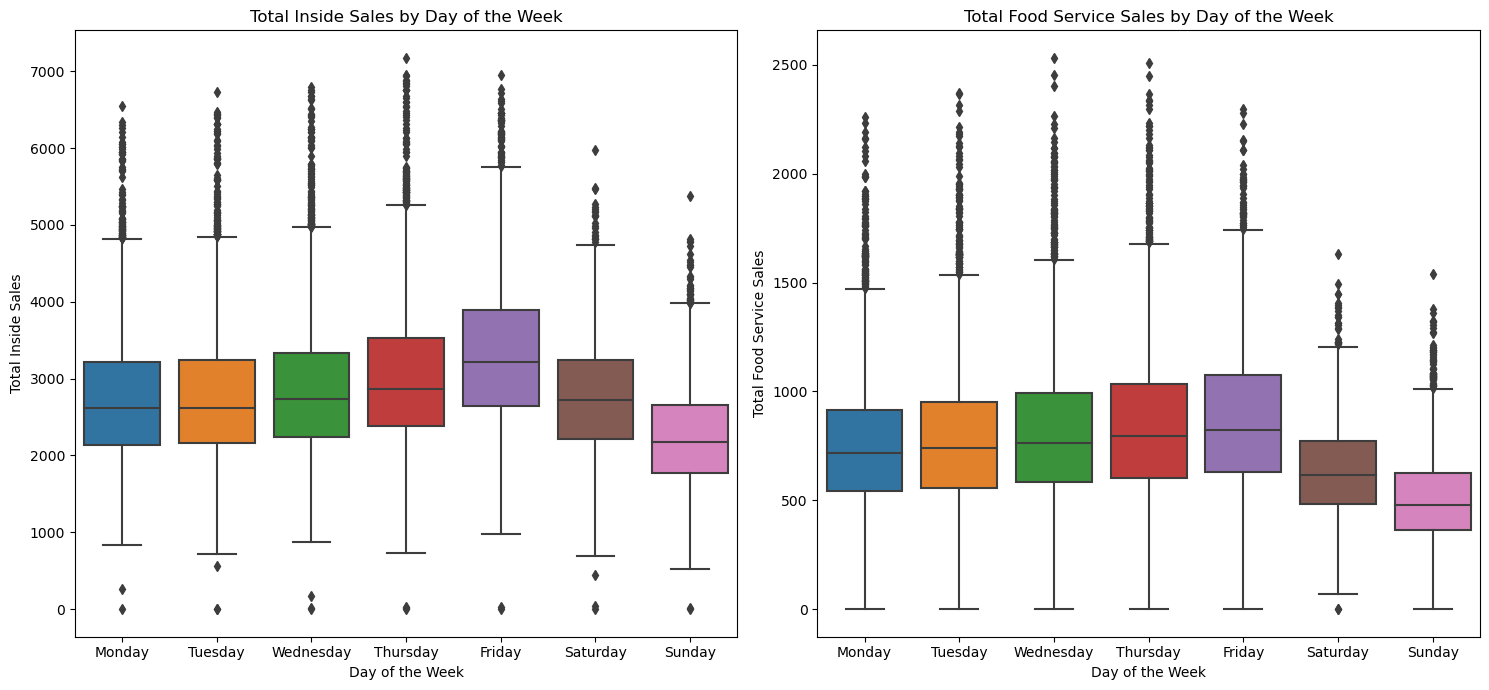

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

day = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Box plot of total_inside_sales by day of the week
sns.boxplot(ax=axes[0], x='calendar.day_of_week', y='daily_yoy_ndt.total_inside_sales', data=data,order=day)
axes[0].set_title('Total Inside Sales by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Inside Sales')

# Box plot of total_food_services by day of the week
sns.boxplot(ax=axes[1], x='calendar.day_of_week', y='daily_yoy_ndt.total_food_service', data=data,order=day)
axes[1].set_title('Total Food Service Sales by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Food Service Sales')

# Adjust spacing between the two subplots
plt.tight_layout()

# Show the combined figure
plt.show()

### Day of Week Seasonality Analysis  
The box plot for total inside sales by day of the week shows that there is a clear pattern in sales through the week. Both median and the interquartile range suggests a consistent increase from Monday to Friday, peaking on Friday, and then a decrease over the weekend. Food service sales exhibit a similar trend to total inside sales, with a steady increase from Moday to Friday and a peak on Friday. This suggests that the customer behaviour and patterns for food service sales align with those of total inside sales.  
  
Friday stands out as the top-performing day for total inside sales. This is the day when the median sales are at their highest. It's likely that this peak is due to increased customer traffic and higher sales volumes, possibly related to the end of the work week. On the other hand, Sunday has the lowest median sales among the days of the week. This dip may be because of many business operate with reduced hours on Sundays, resulting in lower sales. As with total inside sales, Friday is the day with the highest median food service sales. This could be due to the same factors that boost total inside sales on Fridays. Similarly Sunday has the lowest median food service sales. The lower sales on Sundays might be related to reduced operating hours or customer preferences.  

Total inside sales have outliers on both the higher and lowe sides of the distribution. Outliers on the higher side could be indicative of unusually high sales days, which may be due to special promotions, events, or other factors. Outliers on the lower side may represent days with significantly lower sales, possibly due to adverse weather conditions or holidays.
Food service sales have more outliers on the higher side of the distribution. These outliers could represent days with exceptionally high food service sales, possibly driven by special menu items or promotions that are particularly popular with customers.

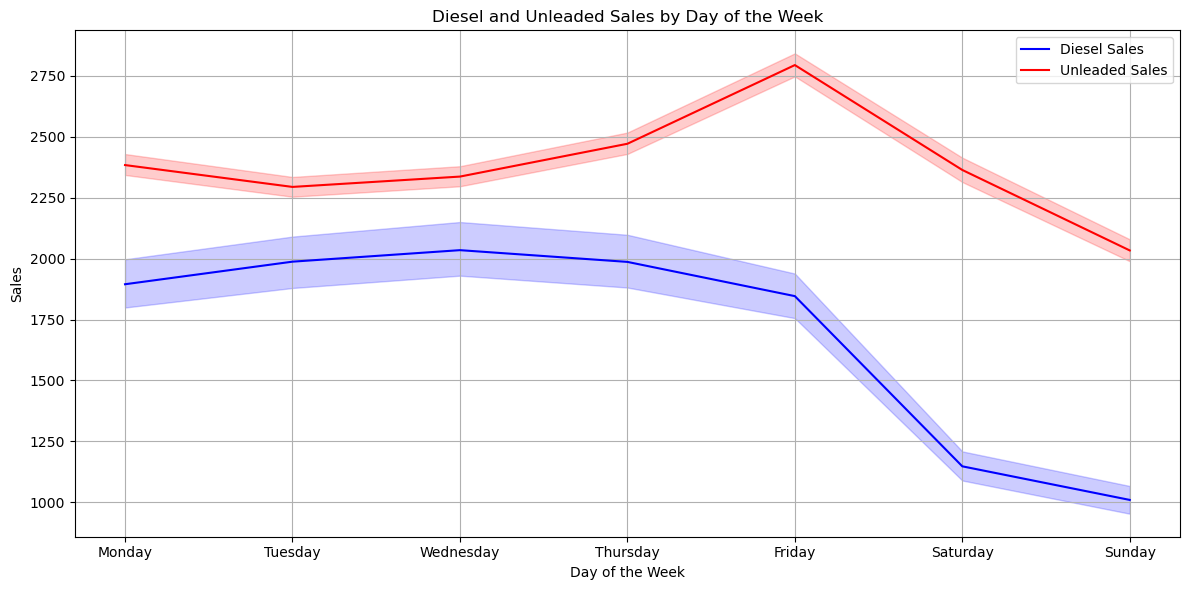

In [15]:
# Assuming your data already has a 'calendar.day_of_week' column, and you want to set it as the index.
# If it's not in the correct order, you can use pd.Categorical to specify the order.
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['calendar.day_of_week'] = pd.Categorical(data['calendar.day_of_week'], categories=weekday_order, ordered=True)
data.set_index('calendar.day_of_week', inplace=True)

# Create a figure
plt.figure(figsize=(12, 6))

# Plot Diesel Sales
sns.lineplot(data=data, x=data.index, y='diesel', color='b', label='Diesel Sales')

# Plot Unleaded Sales on the same graph using a different color
sns.lineplot(data=data, x=data.index, y='unleaded', color='r', label='Unleaded Sales')

# Customize plot labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title("Diesel and Unleaded Sales by Day of the Week")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Unleaded sales experience their highest sales volumes on Fridays. This could be attributed to the end of the workweek when many people are on the road, commuting  or preparing for weekend trips. Friday is often associated with increases travel and leisure activities, which lead to higher fuel consumption. Diesel sales reach their highest point on Wednesdays. This may be influenced by various factors such as requiring more diesel fuel for transportation purposes for industries and businesses.  

Unleaded sales exhibit a significant decline over the weekend, with Sunday having the lowest sales. This is a common trend in the fuel industry, as weekends typically see reduced commuting and business-related travel. People tend to stay home more on Sundays, resulting in lower demand. Similarly, diesel sales also experience a decline on the weekend, with Sunday having the lowest sales. This can be explained by reducedd commercial activity and long-haul transportation on weekends, leading to decreased demand for diesel fuels.  

Unleaded sales follow a pattern of gradual increase from Monday to Friday. This is likely due to the fact that people tend to drive more during the workweek, whether for commuting to work or running errands. As the workweek progresses, fuel consumption typically rises. There is a slight dip in unleaded sales from Monday to Tuesday. This couls be related to people conserving fuel early in the workweek or simply a minor fluctuation in daily driving patterns.
Diesel sales show a consistent increase from Monday to Friday, making the workweek the peak period for diesel consumption. This rise couls be attributed to the increases movement of goods and services during the workweek, including freight transportation and industrial ativities. Diesel sales exhibit a noticeable drop on Saturdays. This could be due to reduced industrial and commercial operations on weekends, as well as less long-distance trucking.

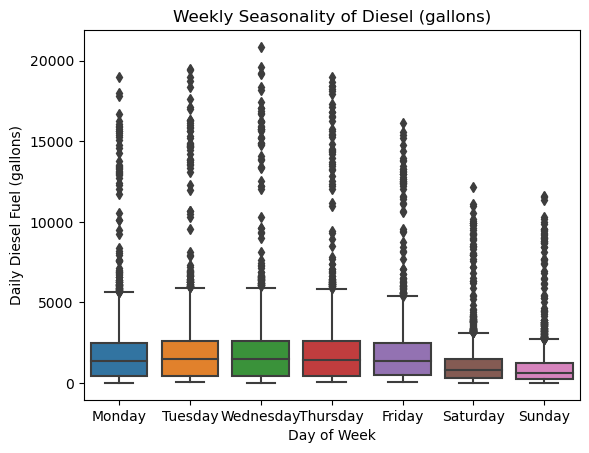

In [16]:
day_d = sns.boxplot(y='diesel', 
                  x = 'calendar.day_of_week', 
                  data=ts_data, 
                  order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_d.set_title('Weekly Seasonality of Diesel (gallons)')
day_d.set_xlabel('Day of Week')
day_d.set_ylabel('Daily Diesel Fuel (gallons)')

plt.show()

It became obvious that Diesel sales exhibit a high degree of variation in sales volume, so further investigation was carried out to determine root causes of this variation.  
First, it was examined what role the number of Hi-Flow fueling positions (these are able to dispense a large amount of diesel quickly, and aren't typically used by passenger vehicles) has on Diesel sales volume.

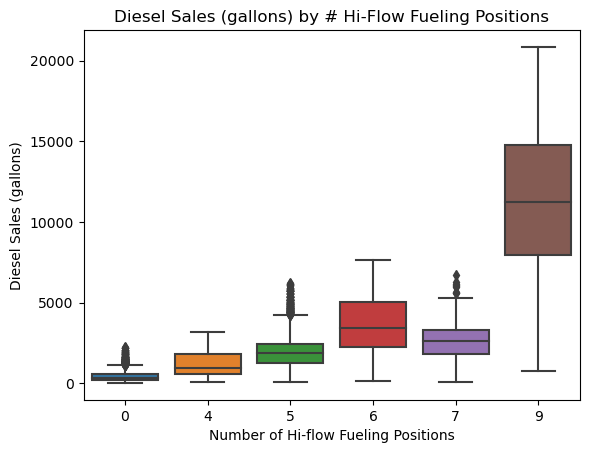

In [17]:
d_pos = sns.boxplot(data=merged_data, 
                        x=merged_data['hi_flow_lanes_fueling_positions_2'],
                        y='diesel_x'
                       )
d_pos.set_title('Diesel Sales (gallons) by # Hi-Flow Fueling Positions')
d_pos.set_ylabel('Diesel Sales (gallons)')
d_pos.set_xlabel('Number of Hi-flow Fueling Positions')
plt.show()

Evident from this chart, much of the variation is due to sites with 9 Hi-Flow fueling positions.  
  
Further examination, showed a slightly modified seasonalilty with Diesel sales volumes building to mid-week and then decreasing through the weekend.  It also was noted that only a single site in the dataset met these criteria.  This fact will be important to take account of during modelling.

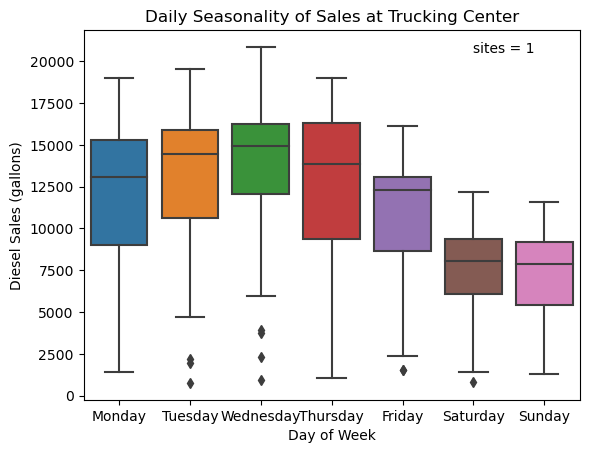

In [18]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] > 8, ['site_id_msba','diesel_x', 'calendar.day_of_week']]

d_tc = sns.boxplot(data=tc_diesel, 
                        x='calendar.day_of_week',
                        y='diesel_x',
                        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                       )
d_tc.set_title('Daily Seasonality of Sales at Trucking Center')
d_tc.set_ylabel('Diesel Sales (gallons)')
d_tc.set_xlabel('Day of Week')
d_tc.text(5, 20500, ('sites = ' + str(len(tc_diesel['site_id_msba'].unique()))))

plt.show()

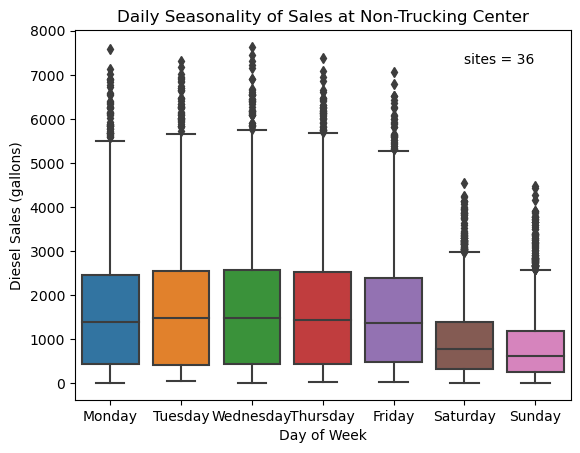

In [19]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] < 8, ['site_id_msba','diesel_x', 'calendar.day_of_week']]

d_tc = sns.boxplot(data=tc_diesel, 
                        x='calendar.day_of_week',
                        y='diesel_x',
                        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                       )
d_tc.set_title('Daily Seasonality of Sales at Non-Trucking Center')
d_tc.set_ylabel('Diesel Sales (gallons)')
d_tc.set_xlabel('Day of Week')
d_tc.text(5, 7250, ('sites = ' + str(len(tc_diesel['site_id_msba'].unique()))))

plt.show()

When the Non-Trucking Center sites were examined, they displayed very consistent volume during the week, and the characteristic drop off on Saturday and Sunday sales volumes.

### Fiscal Week Seasonality Analysis  
Following the examination of weekday seasonality, it was determined to examine seasonality over the course of the fiscal year, by fiscal week.  The data was still at the daily grain, but grouped by fiscal week.  

First, Inside Sales showed an annual trend of growth through the late spring and summer and gradual decrease into the winter months.

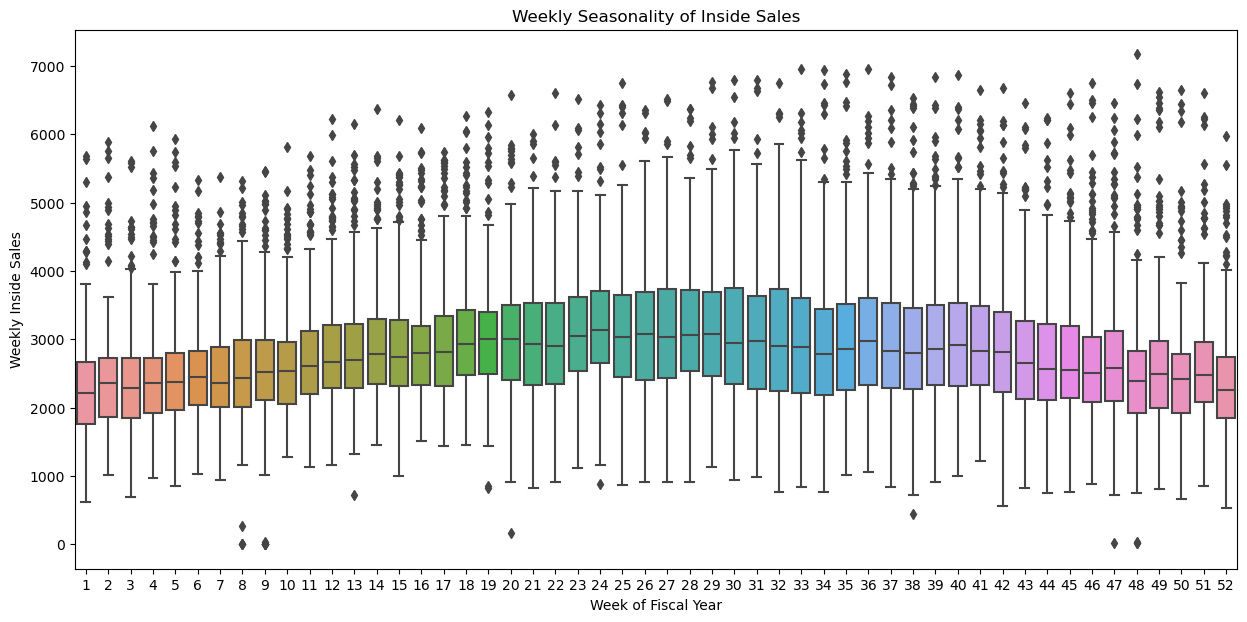

In [20]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='inside_sales', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Inside Sales')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Inside Sales')

plt.show()

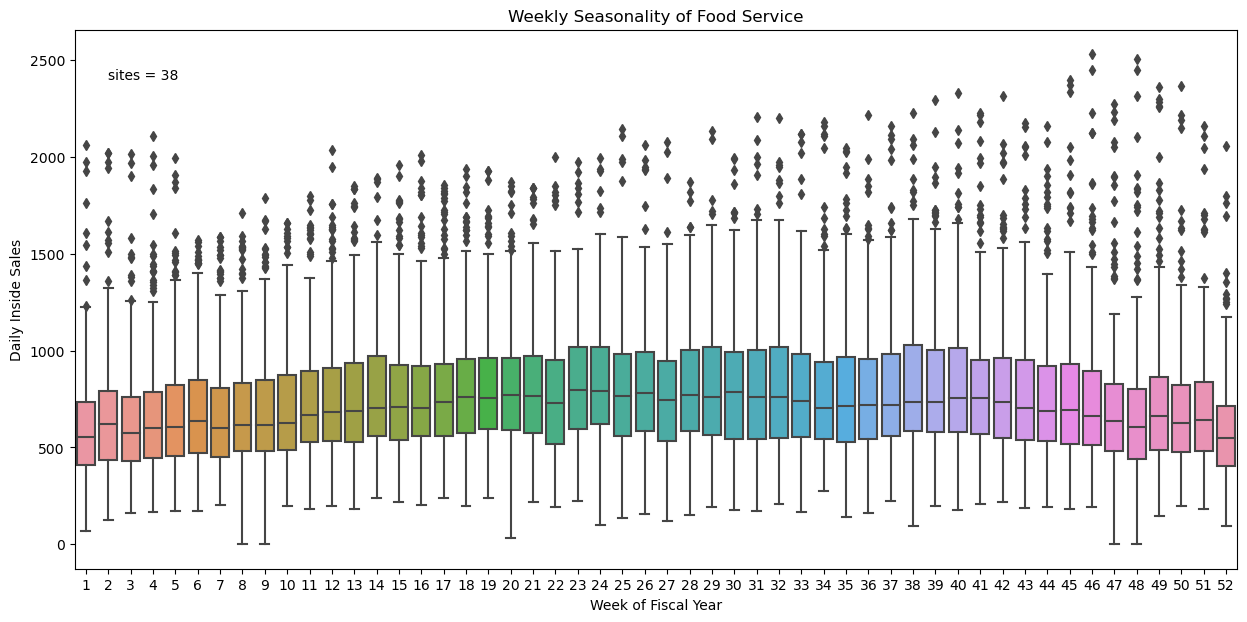

In [21]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='food_service', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Food Service')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Daily Inside Sales')
week_is.text(1, 2400, ('sites = ' + str(len(ts_data['site_id_msba'].unique()))))

plt.show()

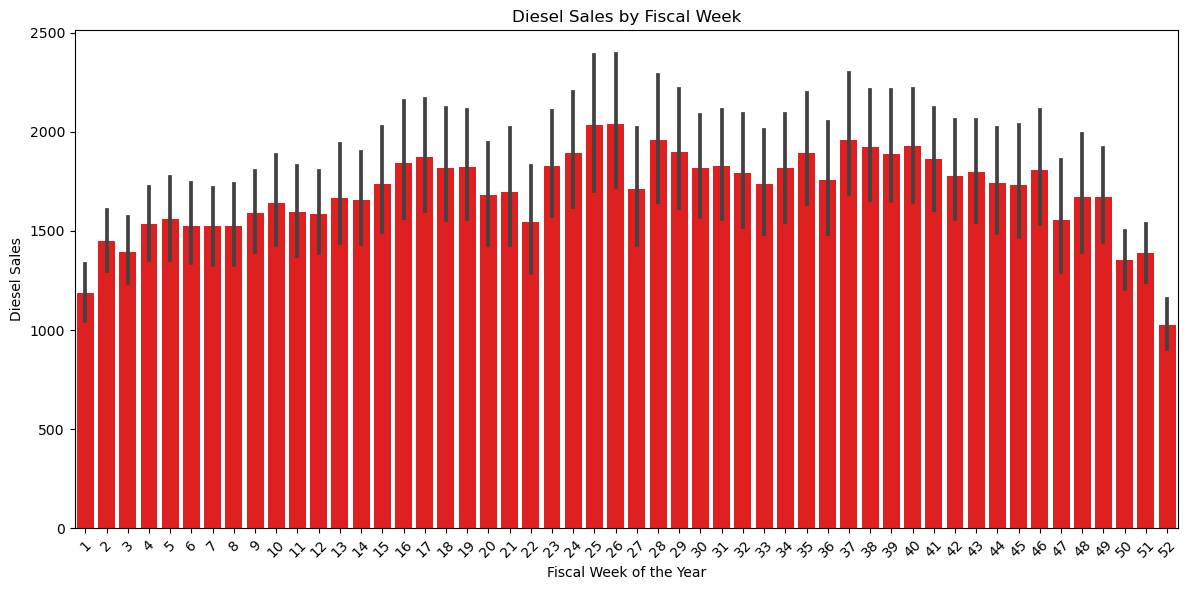

In [22]:
data.set_index('calendar.fiscal_week_id_for_year', inplace=True)
# Create the second figure for Diesel Sales
plt.figure(figsize=(12, 6))

# Plot Diesel Sales
sns.barplot(data=data, x=data.index, y='diesel', color='r')
plt.xlabel("Fiscal Week of the Year")
plt.ylabel("Diesel Sales")
plt.title("Diesel Sales by Fiscal Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the second plot
plt.tight_layout()
plt.show()

The sales of diesel follow a trajectory that includes initial growth, a mid-year dip, a resurgence, a sinusoidal fluctutaion and a gradual decline with a sudden drop at the end of the year.
At the beginning from 1st week to 17th week, there is a steady and gradual increase in sales. This period is marked by a consistent upward trend as more and more diesel is being sold.As we reach the 22nd week , there is a noticeable decline in sales which continues until the 27th week when there is a sudden resurgence and sales start to increase again. This period from the 27th to the 36th week, shows a wave-like pattern, with regular fluctuations in sales.  

As we approach the 36th week, the sales begin to gradually decrease once more. Towards the end of the year, in the last three weeks, there is a sharp and abrupt drop in sales.

Diesel sales were examined and again displayed a consistent sales volume with significant outliers.  Like daily sales by weekday, Diesel sales were divided into Trucking Center vs Non-Trucking Center and compared.

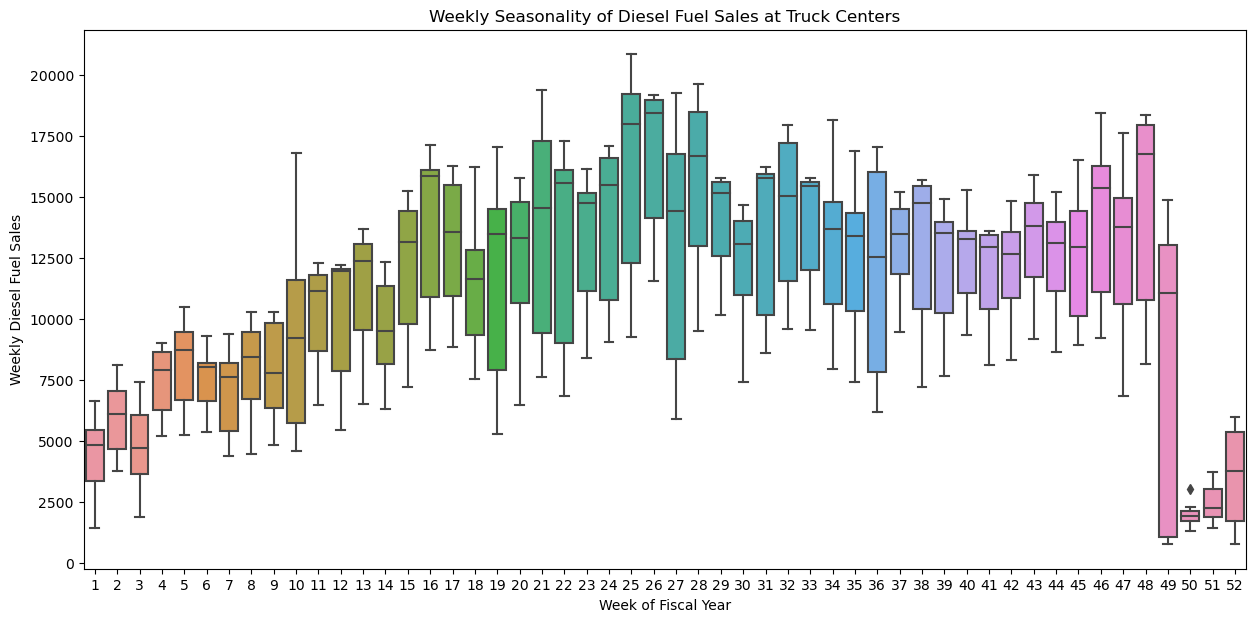

In [24]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] > 8, ['diesel_x', 'calendar.fiscal_week_id_for_year','site_id_msba']]

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel_x', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_diesel)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales at Truck Centers')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

Trucking Center Diesel Sales showed an interesting trend of building through the first half of the year, staying relatively consistent until the winter holiday season, at which time they drop to significantly lower levels.

21 stores


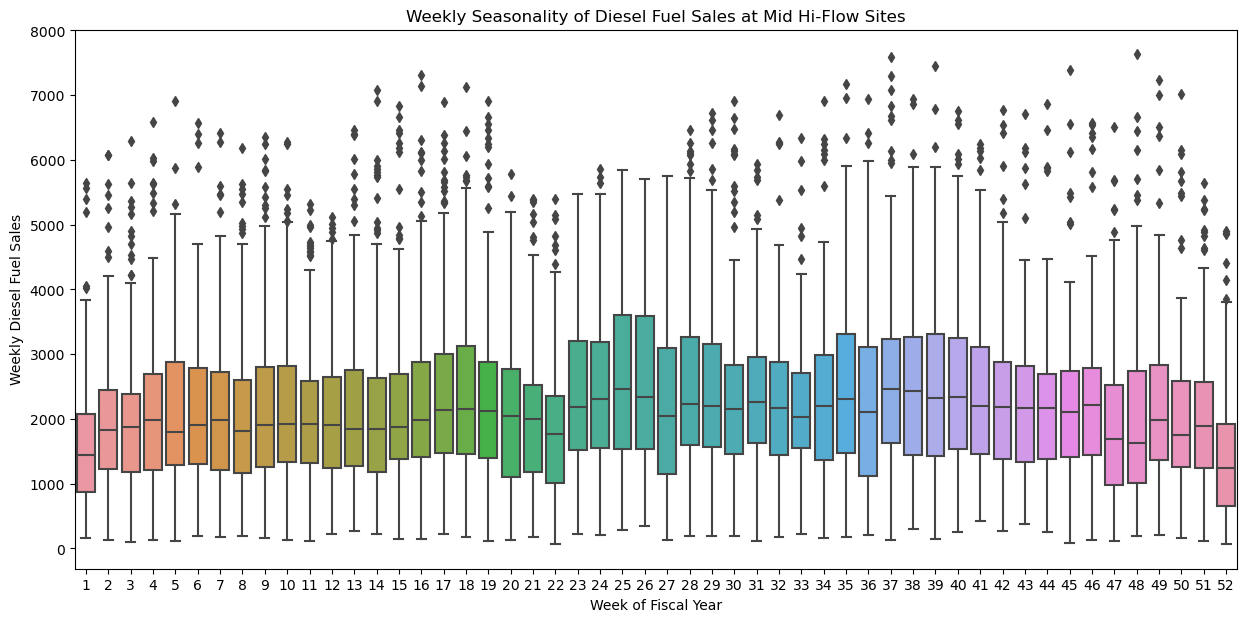

In [25]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'].between(1,7), ['diesel_x', 'calendar.fiscal_week_id_for_year','site_id_msba']]
print(len(tc_diesel['site_id_msba'].unique()), 'stores')

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel_x', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_diesel)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales at Mid Hi-Flow Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

In this case, it became valuable to examine Diesel Sales in terms of sites with Hi-Flow positions < 9, but > 0 in addition to those that have no H-Flow fueling positions.  The former, displayed above showed consistent sales levels throughout the year, slightly elevated during the summer.  

Sites with no Hi-Flow positions were plotted seperately, and display a similar seasonality, but at a significantly lower level.  A interesting cluster of outliers was noted from weeks 8-14 that should be further explored, possibly in relation to holidays.

15 stores


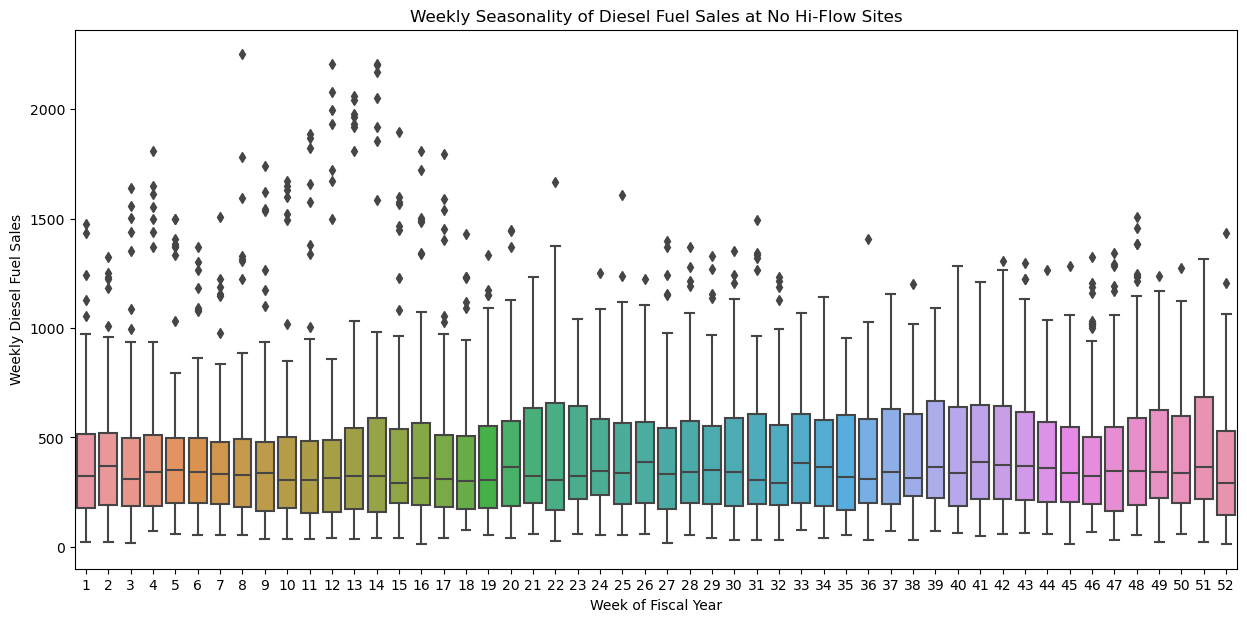

In [26]:
tc_diesel = merged_data.loc[merged_data['hi_flow_lanes_fueling_positions_2'] == 0, ['diesel_x', 'calendar.fiscal_week_id_for_year','site_id_msba']]
print(len(tc_diesel['site_id_msba'].unique()), 'stores')

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='diesel_x', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_diesel)
week_is.set_title('Weekly Seasonality of Diesel Fuel Sales at No Hi-Flow Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')

plt.show()

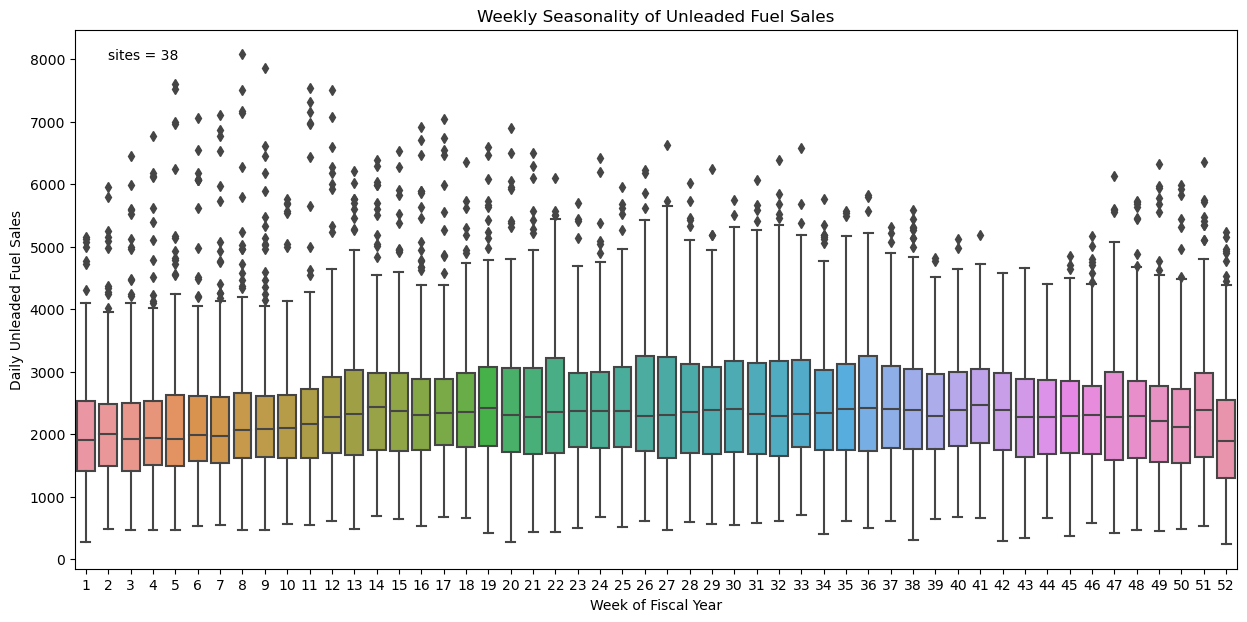

In [28]:
fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='unleaded', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=ts_data)
week_is.set_title('Weekly Seasonality of Unleaded Fuel Sales')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Daily Unleaded Fuel Sales')
week_is.text(1, 8000, ('sites = ' + str(len(ts_data['site_id_msba'].unique()))))

plt.show()

Sales of unleaded fuel exhibit a distinct pattern throughout the year. At the begiining of the year, from the 1st to the 15th week, there is a steady and gradual increase in sales. This upward trajectory continues until the 15th week. From there, sales stabalize and remain relatively consistent within a certain range until the 38th week. We do not see much variation in sales figures during this time.  

However, in the 38th week, a noticeable change occurs as sales start to decline gradually. This decline continues until the 51st week when there is an unexpected and significant positive spike in sales. This sudden increase could be due to various factors such as promotions, seasonal demand or other market dynamics.
Conversely, in the 52nd week, there is a sudden drop in dales which contrasts with the preceding week's surge. This drop might be attributted to factors like the end of special promotions or the holiday season coming to an end to the end of the year.

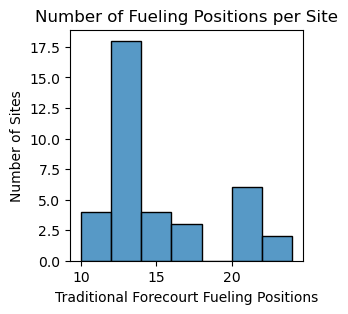

In [29]:
u_pos_count = qual_data[['site_id_msba', 'traditional_forecourt_fueling_positions']]

fig = plt.figure(figsize = (3,3))
fuel_pos = sns.histplot(data=u_pos_count,
                        x = 'traditional_forecourt_fueling_positions')
fuel_pos.set_title('Number of Fueling Positions per Site')
fuel_pos.set_xlabel('Traditional Forecourt Fueling Positions')
fuel_pos.set_ylabel('Number of Sites')

plt.show()

Looking at the number of fueling posistions in the traditional forecourt, shows that there are 2 clear groupings based on size, designated as large and small forecourt.  These were examined to see if there were any differences in sales volume or seasonality.  

The Large Forecourt sites showed more variablility over the course of the year with sales building through fiscal week 14, then staying relatively stable through week 41, before declining again.  

Small Forecourt sites were much more stable and while there is a small increase during summer months, it is relatively small in terms of absolute increase in sales volume.

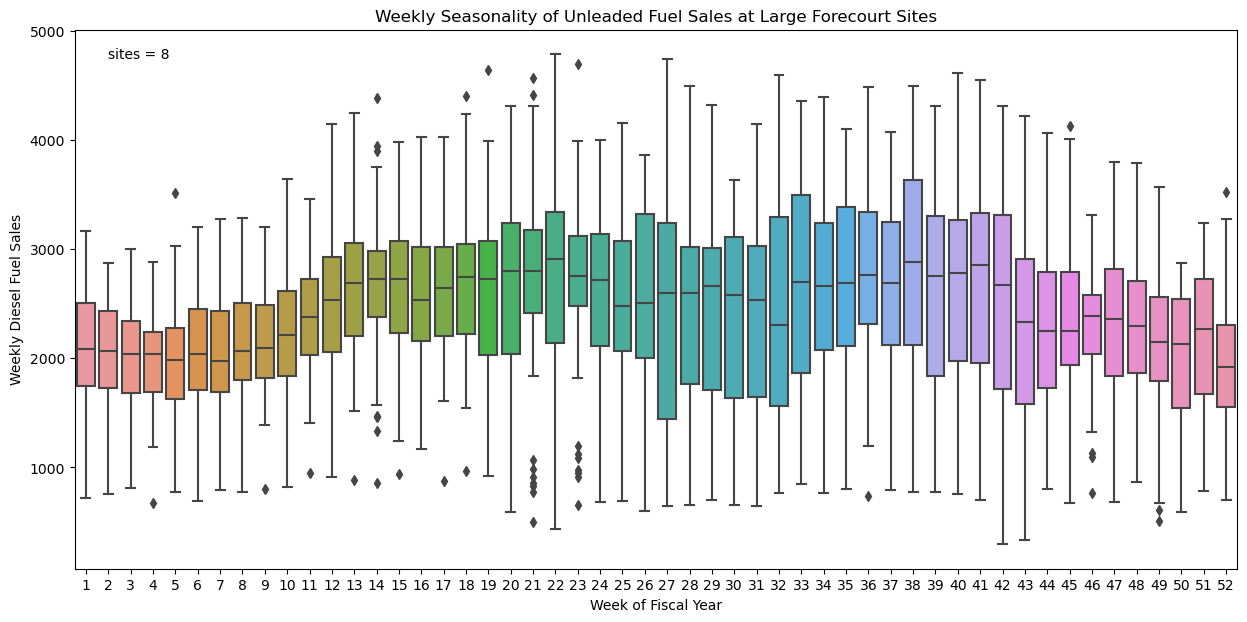

In [30]:
tc_unleaded = merged_data.loc[merged_data['traditional_forecourt_fueling_positions'] > 19, ['unleaded', 'calendar.fiscal_week_id_for_year','site_id_msba']]

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='unleaded', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_unleaded)
week_is.set_title('Weekly Seasonality of Unleaded Fuel Sales at Large Forecourt Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')
week_is.text(1, 4750, ('sites = ' + str(len(tc_unleaded['site_id_msba'].unique()))))

plt.show()

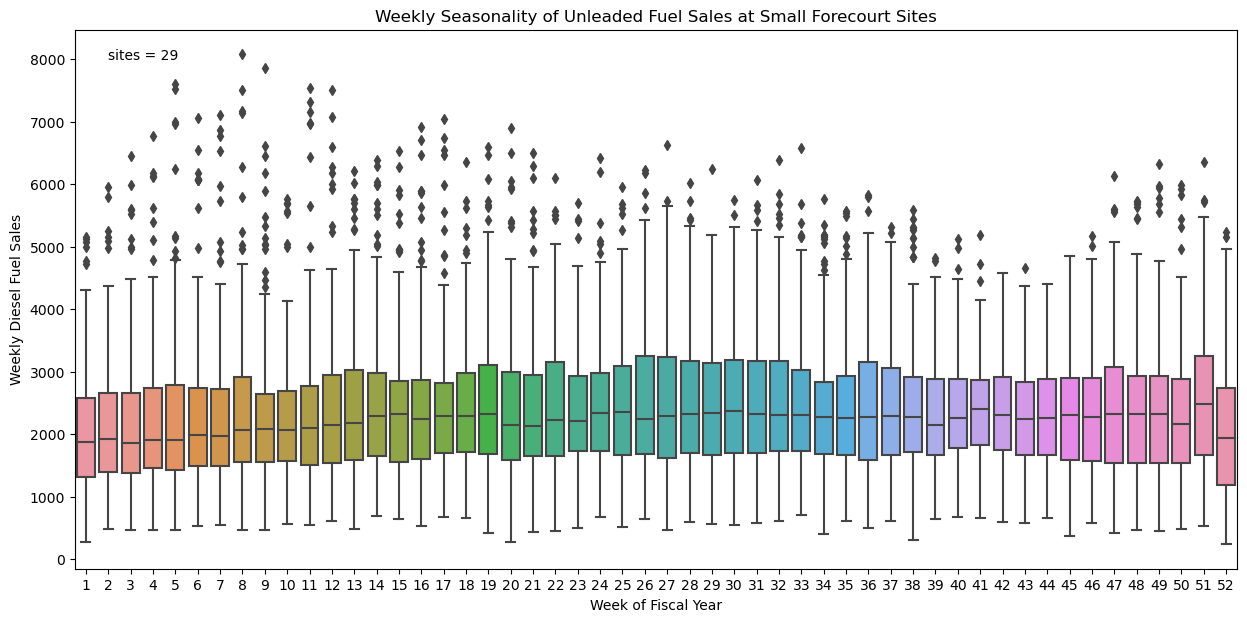

In [31]:
tc_unleaded = merged_data.loc[merged_data['traditional_forecourt_fueling_positions'] < 19, ['unleaded', 'calendar.fiscal_week_id_for_year','site_id_msba']]

fig = plt.figure(figsize = (15,7))
week_is = sns.boxplot(y='unleaded', 
                  x = 'calendar.fiscal_week_id_for_year', 
                  data=tc_unleaded)
week_is.set_title('Weekly Seasonality of Unleaded Fuel Sales at Small Forecourt Sites')
week_is.set_xlabel('Week of Fiscal Year')
week_is.set_ylabel('Weekly Diesel Fuel Sales')
week_is.text(1, 8000, ('sites = ' + str(len(tc_unleaded['site_id_msba'].unique()))))

plt.show()

### Correlation Analysis

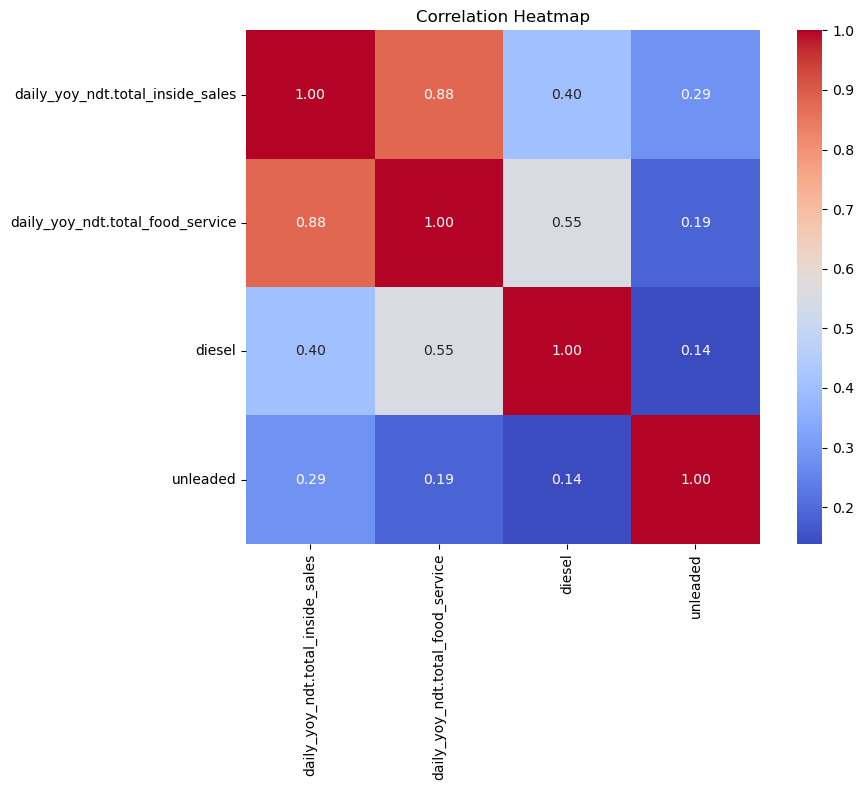

In [32]:
# Assuming you have a DataFrame 'df' containing your data
# Select the numeric columns for which you want to calculate correlations
numeric_columns = ["daily_yoy_ndt.total_inside_sales", "daily_yoy_ndt.total_food_service", "diesel", "unleaded"]

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Customize plot labels and title
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()

The heatmap analysis reveals a noteworthy positive correlation between the daily total inside sales and the daily total food services. This suggests that when the daily total inside sales increase, there is a tendency for the daily total food services to increase as well. This correlation implies a potentially complementary relationship between these two variables, where an uptick in one variable often accompanies a rise in the other.  

In contrast, the heatmap illustrates a notable negative correlation between daily total inside sales and diesel sales. This implies that as daily total inside sales rise, diesel sales tend to decrease, and vice versa. This negative correlation suggests a potential trade-off or inverse relationship between these two variables, where an increase in one is often associated with a decrease in the other. Similar is the case with daily total food services towards diesel sales.  

Similarly, we observe a negative correlation between daily total inside sales and unleaded sales in the heatmap. This indicates that when daily total inside sales go up, unleaded sales tend to decrease, and vice versa. Like the diesel sales correlation, this negative relationship suggests that there may be factors or dynamics at play that lead to an inverse pattern between daily total inside sales and unleaded sales. Similar is the case with daily total food services towards unleaded sales.  

Furthermore, the heatmap uncovers a negative correlation between diesel and unleaded sales, indicating that when diesel sales increase, unleaded sales tend to decrease, and vice versa. This correlation suggests a potential competition or substitution effect between these two types of fuel sales, where an increase in one is associated with a decrease in the other.

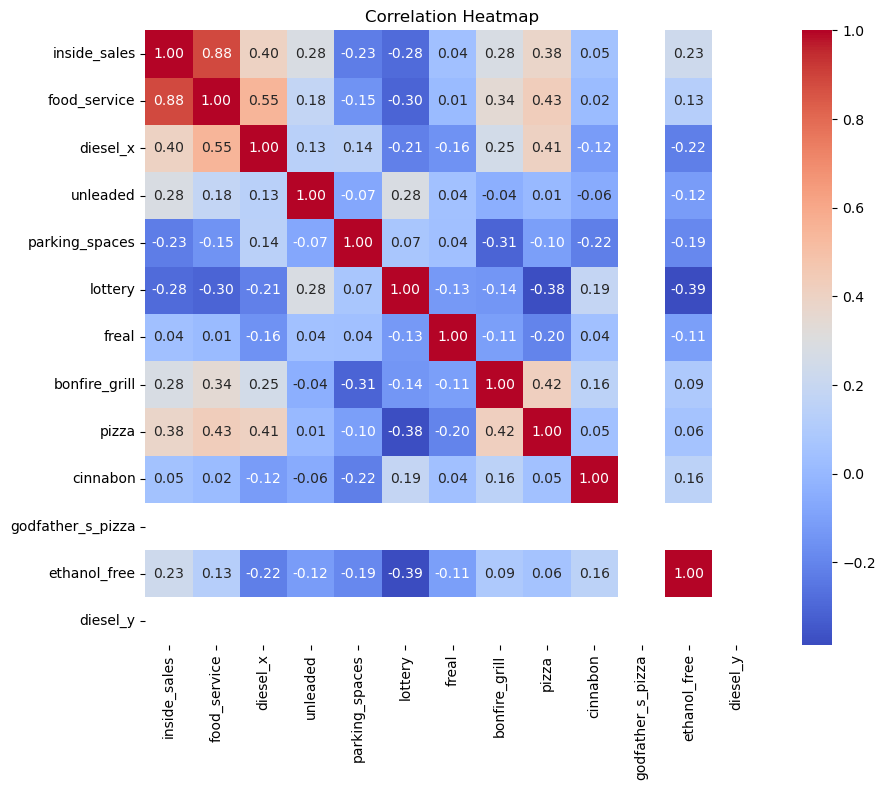

In [33]:
df = pd.read_csv('../Maverik_Capstone/data/merged_data.csv')

# List of numeric columns
numeric_columns = ["inside_sales", "food_service", "diesel_x", "unleaded",
                   "parking_spaces", "lottery", "freal", "bonfire_grill", 
                   "pizza", "cinnabon", "godfather_s_pizza", "ethanol_free", "diesel_y"]

# Convert "Yes" and "No" to 1 and 0 for binary variables
binary_columns = ["lottery", "freal", "bonfire_grill", "pizza", "cinnabon", "godfather_s_pizza", "ethanol_free", "diesel_y"]

df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Customize plot labels and title
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()

Inside sales exhibit a positive correlation with pizza. There is a complementary relationship between customers buying other products inside the store and choosing pizza. Customers may have different preferences when it comes to other products and increasing inside sales does not necessarily lead to an increase in the sales of these items.  

Food Sales demonstrates positive correlation with both Bonfire Grill and pizza.It indicates a positive synergy between food service offerings and these specific food items. Food service sales have negative correlations with other products mentioned.  

Diesel sales have negative correlations with most of the products, exept pizza. This suggests that when diesel sales increase, sales of other products tend to decrease or remain stable. The exception is pizza, which may have a different consumer base or usage pattern.
Unleaded sales display negative correlation with all the products mentioned above. This implies that the sales of the products tend to decrease or remain stable when Unleaded sales increases. Unleaded sales might not be closely related to these product categories.

### Results  
Based upon our intial analysis, there are several variables which are likely to inform a machine learning model, therefore we propose to continue with this dataset to the modelling phase.  Several variables were also identified that have no variation in the data set and so may be excluded.  Both 'day of week' and 'annual fiscal week' data showed recognizable seasonality trends which will be important to incorporate into any machine learning model.  It is likely that several engineered features will need to be created, however, the current data has already shown that it can capture a significant amount of the variation in the dataset.  We propose due to the differences in the 4 key segments it will be necessary to create multiple models in order to accurately forecast sales volumes for each segment.

### Group Member Contributions
Sampoornaa Ghosh: Time Series Analysis  
Samruddhi Supekar: Introduction, Qualitative Data Analysis  
Chris Porter: Time Series Analysis, Notebook Creation  

## Appendix 1: Data Dictionaries

## **Data Sets Used in Project**


### time_series_data_msba.csv

| Column                          | Description                                                                                          |
|---------------------------------|------------------------------------------------------------------------------------------------------|
| CAPITAL_PROJECTS.SOFT_OPENING_DATE                      | This column represents the date when a particular store opened as part of a capital project. This information is crucial for tracking when new stores become operational, allowing for analysis related to store expansion and the impact of new store openings on sales.                                                                             |
| CALENDAR.CALENDAR_DAY_DATE                          | This column contains calendar dates. These dates are essential for organizing and tracking events or activities over time. They serve as the primary timestamp for the data.  |
| CALENDAR.FISCAL_WEEK_ID_FOR_YEAR              | This column provides the fiscal week number corresponding to the date. In financial reporting, organizations often use fiscal weeks instead of calendar weeks to align with their accounting practices. It helps in tracking weekly performance within the fiscal year.                                                          |
| CALENDAR.DAY_OF_WEEK                     | This column indicates the day of the week corresponding to the date. Understanding which day of the week an event or observation occurred on is essential for analyzing trends and patterns, such as weekend sales spikes or weekday lulls.                                                                                 |
| CALENDAR_INFORMATION.HOLIDAY                    | This column provides information about holidays that may have occurred on the date. Holidays can significantly impact sales patterns.                                                                        |
| CALENDAR_INFORMATION.TYPE_OF_DAY                 | This column categorizes the day into different types, such as “WEEKDAY” or “WEEKEND”. Knowing the day type is useful for identifying differences in sales behavior between weekdays and weekends, which can inform staffing and inventory decisions.                                                              |
| DAILY_YOY_NDT.TOTAL_INSIDE_SALES                    | This column represents the total inside sales for the day. Inside sales typically refer to all sales that occur within the store, excluding sales of items like gasoline.                                                                    |
| DAILY_YOY_NDT.TOTAL_FOOD_SERVICE                | This column represents the total sales for food services made at the store. It specifically focuses on revenue generated from food service operations within the store.                                                                                 |
| DIESEL                      | This column indicates the volume of diesel gallons sold on the given date.                                                                            |
| UNLEADED                     | This column indicates the volume of all non-diesel gallons sold on the given date. It covers the sales of unleaded gasoline and other non-diesel fuels.                                                                                         |
| SITE_ID_MSBA                 | This column serves as a unique site identifier or key for each store location entry in the dataset. 


### qualitative_data_msba.csv

| Column                          | Description                                                                                          |
|---------------------------------|------------------------------------------------------------------------------------------------------|
| OPEN_YEAR                      | This column represents the year when each store was opened.                                                                             |
| SQUARE_FEET                          | This column provides the square footage of each store, which is crucial for understanding the size and scale of the retail locations.  |
| FRONT_DOOR_COUNT              | It indicates the number of entrances or front doors for each store.                                                          |
| YEARS_SINCE_LAST_PROJECT                     | This column tells you how many years have passed since the last project was completed at each store. It provides insights into the frequency of store renovations or improvements.                                                                                 |
| PARKING_SPACES                    | This column represents the number of parking spaces available at each store , which is essential for understanding the convenience and accessibility of the locations.                                                                        |
| LOTTERY, FREAL, BONFIRE_GRILL, PIZZA, CINNABON, GODFATHER_S_PIZZA, ETHANOL_FREE, DIESEL, HI_FLOW_LANES, RV_LANES, HI_FLOW_RV_LANES, DEF, CAT_SCALES, CAR_WASH, EV_CHARGING, RV_DUMPS, PROPANE                 | These columns are binary(Yes/No) indicators of various services and amenities offered at each store, such as lottery ticket sales, food offerings, fuel types, truck services, car wash, electric vehicle charging, etc.                                                              |
| X1_MILE_, X1_2_MILE_, X5_MIN_, X7_MIN                    | These columns provide demographic and economic data for different radiuses around each store, including population, employment and income levels. These are important for understanding the local market and potential customer base.                                                                    |
| TRADITIONAL_FORECOURT_FUELING_POSITIONS, TRADITIONAL_FORECOURT_LAYOUT, TRADITIONAL_FORECOURT_STACK_TYPE                | These columns describe the setup of traditional forecount fueling positions, including the number of positions, layout type, and stack type.                                                                                 |
| RV_LANES_FUELING_POSITIONS, RV_LANES_LAYOUT, RV_LANES_STACK_TYPE                      | Similar to the traditional forecourt, these columns describe the setup of RV fueling lanes.                                                                            |
| HI_FLOW_LANES_FUELING_POSITIONS, HI_FLOW_LANES_LAYOUT, HI_FLOW_LANES_STACK_TYPE                     | These columns describe the setup of high flow fueling lanes.                                                                                         |
| HI_FLOW_LANES_FUELING_POSITIONS_2, RV_LANES_FUELING_POSITIONS_2, HI_FLOW_RV_LANES_LAYOUT, HI_FLOW_RV_LANES_STACK_TYPE                 | These columns seem to be related to additional information about fueling positions and layout for high flow and RV lanes. 
| NON_24_HOUR                | Indicates whether the store is open 24/7 or not.                                                                                 |
| SELF_CHECK_OUT                      | Indicates whether self-checkout is available at the store or not.                                                                            |
| MENS_TOILET_COUNT,MENS_URINAL_COUNT,WOMENS_TOILET_COUNT,WOMENS_SINK_COUNT                     | These columns provide the counts of restroom facilities for men and women, including toilets and sinks.                                                                                         |
| SITE_ID_MSBA                 | This column serves as a unique site identifier or key for each store location entry in the dataset. 

## Appendix 2: Single Variable Charts

In [34]:
hue_list = ['lottery', 'freal','bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza',
           'ethanol_free', 'diesel', 'hi_flow_lanes', 'rv_lanes',
       'hi_flow_rv_lanes', 'def', 'cat_scales', 'car_wash', 'ev_charging',
       'rv_dumps', 'propane','traditional_forecourt_fueling_positions',
            'traditional_forecourt_stack_type']
num_col = ['x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
       'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
       'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc']

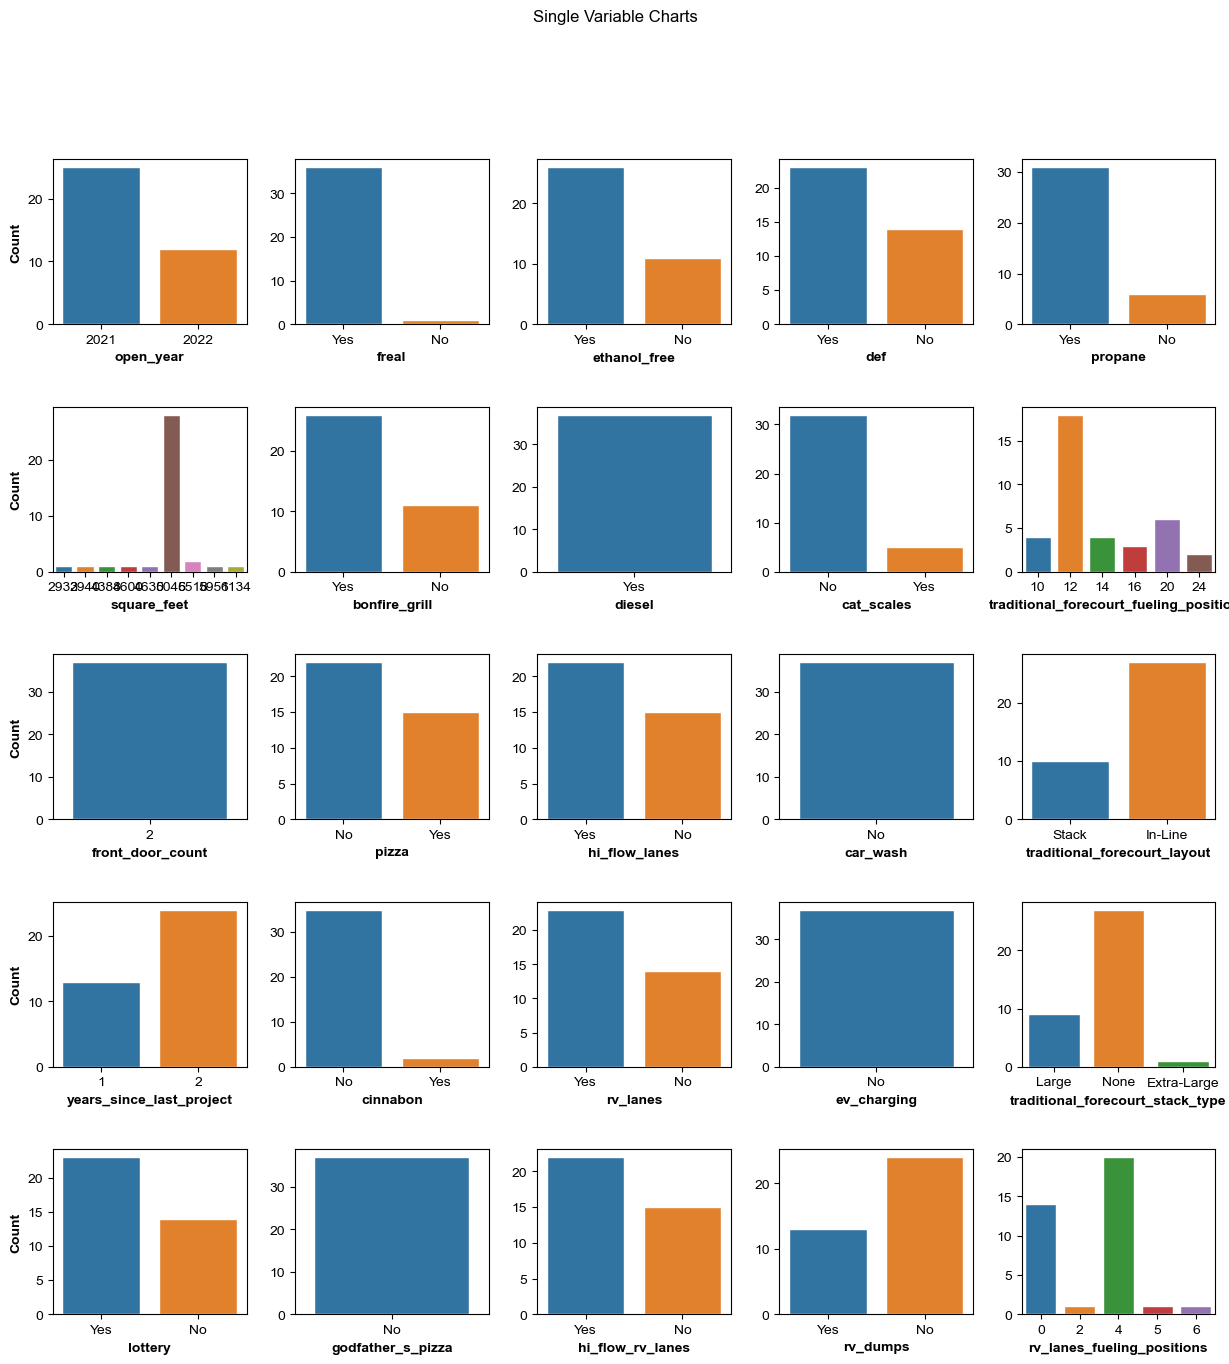

In [35]:
cat_cols = find_categorical(main_df)

fig, axes = plt.subplots(5, 5, figsize =(15,15))
fig.suptitle('Single Variable Charts')
plt.subplots_adjust(hspace=0.5, wspace=0.25)

x = 0
y = 0

for col in cat_cols:
    if x > 4:
        x = 0
        y += 1
        if y >= 5:
            break
    plot_c(main_df,col,x,y)
    x += 1

## Appendix 3: Multivariate Charts

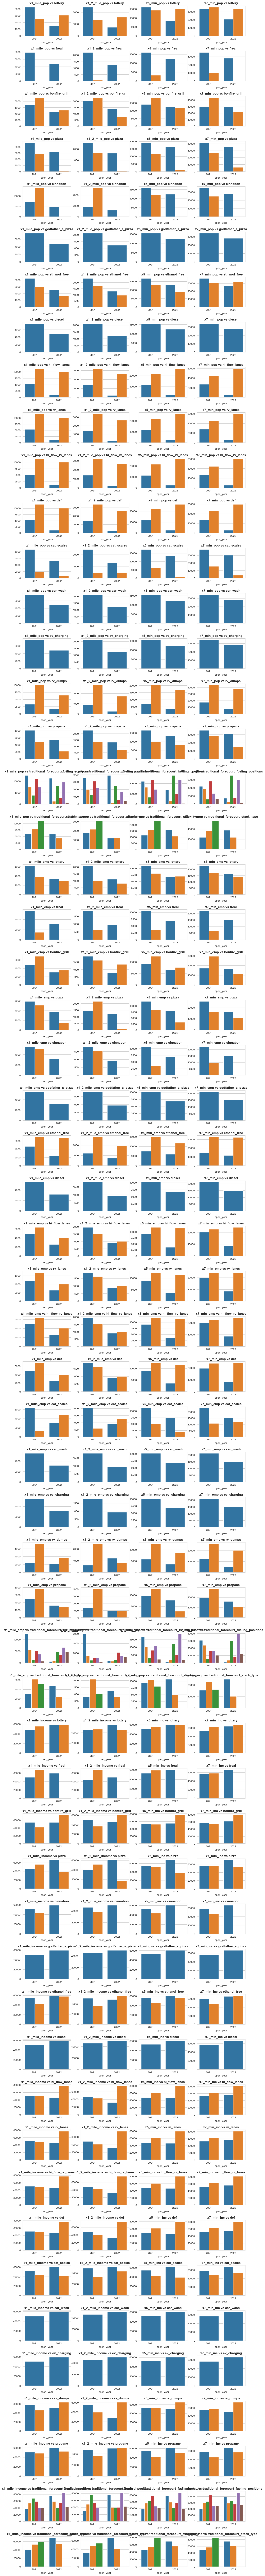

In [41]:
fig, axes = plt.subplots(57, 4, figsize =(15,150))
fig.suptitle('')
plt.subplots_adjust(hspace=0.5, top = 1)

x = 0
y = 0

for k in num_col:
    for h in hue_list: 
        if x > 56:
            x = 0
            y += 1
        if y >= 4:
            break
        plot_multi_var_analysis_main_df(k,h,x,y)
        x += 1